In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Character Recognition Using Hebbian Learning Rule

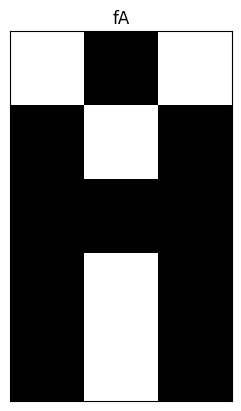

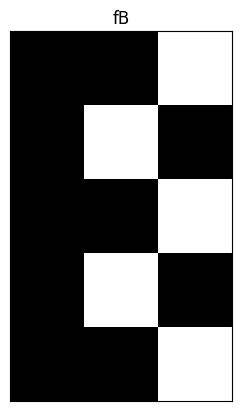

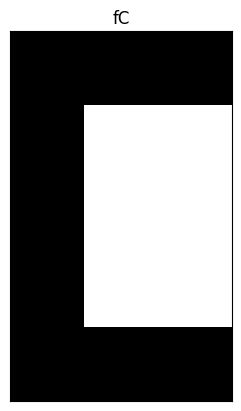

In [21]:
def initialize_vectors(indices, size):
    vector = -np.ones((size, 1))
    vector[indices] = 1
    return vector

def plot_matrix(matrix, shape, title):
    plt.imshow(matrix.reshape(shape), cmap='Greys')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Initialization
A_indices = [3, 10, 16, 18, 23, 25, 30, 31, 32, 36, 40, 43, 47, 49, 55, 56, 62]
B_indices = [0, 1, 2, 3, 4, 7, 12, 14, 20, 21, 26, 28, 29, 30, 31, 32, 35, 40, 42, 48, 49, 54, 56, 57, 58, 59, 60]
C_indices = [2, 3, 4, 8, 12, 14, 20, 21, 28, 35, 42, 48, 50, 54, 58, 59, 60]

tA_indices = [0, 2, 4, 10, 13]
tB_indices = [2, 4, 8, 10, 14]
tC_indices = [4, 5, 7, 8, 10, 11]

A = initialize_vectors(A_indices, 63)
B = initialize_vectors(B_indices, 63)
C = initialize_vectors(C_indices, 63)

tA = -initialize_vectors(tA_indices, 15)
tB = -initialize_vectors(tB_indices, 15)
tC = -initialize_vectors(tC_indices, 15)

W = np.matmul(A, tA.T) + np.matmul(B, tB.T) + np.matmul(C, tC.T)

yA = np.matmul(A.T, W)
yB = np.matmul(B.T, W)
yC = np.matmul(C.T, W)

fA = np.sign(yA)
fB = np.sign(yB)
fC = np.sign(yC)

plot_matrix(fA, (5, 3), 'fA')
plot_matrix(fB, (5, 3), 'fB')
plot_matrix(fC, (5, 3), 'fC')

In [22]:
def decision(probability):
    return random.random() < probability


def mistake(input, probability):
    new_input = np.copy(input)
    for i in range(len(input)):
        if decision(probability) is True:
            new_input[i] = -new_input[i]
    return new_input


def miss(input, probability):
    new_input = np.copy(input)
    for i in range(len(input)):
        if decision(probability) is True:
            new_input[i] = 0
    return new_input


def choose_random_input(A, B, C):
    input = np.array([A, B, C])
    random_input = np.random.choice(input.shape[0], 1)
    return random_input


detect_from_mistakes = 0
for iter1 in range(100):
    rand_in = choose_random_input(A, B, C)
    if (rand_in == 0):
        temp_A = A
        temp_A = mistake(temp_A, 0.5)
        yA_mistake = np.matmul(temp_A.T, W)
        f_mistake = np.sign(yA_mistake)
        f = fA
    elif (rand_in == 1):
        temp_B = B
        temp_B = mistake(temp_B, 0.5)
        yB_mistake = np.matmul(temp_B.T, W)
        f_mistake = np.sign(yB_mistake)
        f = fB
    elif (rand_in == 2):
        temp_C = C
        temp_C = mistake(temp_C, 0.5)
        yC_mistake = np.matmul(temp_C.T, W)
        f_mistake = np.sign(yC_mistake)
        f = fC

    if (np.array_equal(f_mistake, f)):
        detect_from_mistakes += 1
print("percentage is :", 0.5)
print("percentage of detect from mistakes :", detect_from_mistakes / 100)

detect_from_misses = 0
for iter2 in range(100):
    rand_in = choose_random_input(A, B, C)
    if (rand_in == 0):
        temp_A = A
        temp_A = miss(temp_A, 0.4)
        yA_miss = np.matmul(temp_A.T, W)
        f_miss = np.sign(yA_miss)
        f = fA
    elif (rand_in == 1):
        temp_B = B
        temp_B = miss(temp_B, 0.4)
        yB_miss = np.matmul(temp_B.T, W)
        f_miss = np.sign(yB_miss)
        f = fB
    elif (rand_in == 2):
        temp_C = C
        temp_C = miss(temp_C, 0.4)
        yC_miss = np.matmul(temp_C.T, W)
        f_miss = np.sign(yC_miss)
        f = fC

    if (np.array_equal(f_miss, f)):
        detect_from_misses += 1
print("percentage is :", 0.4)
print("percentage of detect from misses :", detect_from_misses / 100)


percentage is : 0.5
percentage of detect from mistakes : 0.13
percentage is : 0.4
percentage of detect from misses : 1.0


### Storage Capacity in an Auto-associative Network

In [23]:
s = np.array([[1, 1, 1, -1]])
t = np.array([[1, 1, 1, -1]])
''''''''''part 1 '''''''''
w = np.matmul(s.T, s)
w = w - np.eye(w.shape[0])
y = np.sign(np.matmul(s, w))
# print("weights : \n", w)
# print("output : ", y)

''''''''''part 2 '''''''''
sample1 = np.array([[-1, 1, -1, -1]])
w1 = np.matmul(sample1.T, sample1)
w1 = w1 - np.eye(w1.shape[0])
y1 = np.sign(np.matmul(sample1, w1))
w2 = w + w1
s1 = np.array([[1, 1, 1, -1], [-1, 1, -1, -1]])
y2 = np.sign(np.matmul(s1, w2))
# print("output1 : \n", y2)
# print("weights : \n", w2)

''''''''''part 3 '''''''''
sample2 = np.array([[1, 1, 1, 1]])
w3 = np.matmul(sample2.T, sample2)
w3 = w3 - np.eye(w3.shape[0])
w4 = w + w1 + w3

s2 = np.array([[1, 1, 1, -1], [-1, 1, -1, -1], [1, 1, 1, 1]])
y3 = np.sign(np.matmul(s2, w4))
# print("output2 : \n", y3)

''''''''''part 4 '''''''''
sample3 = np.array([[1, -1, -1, -1]])
w5 = np.matmul(sample3.T, sample3)
w5 = w5 - np.eye(w5.shape[0])
w6 = w + w1 + w5
s3 = np.array([[1, 1, 1, -1], [-1, 1, -1, -1], [1, -1, -1, -1]])
y4 = np.sign(np.matmul(s3, w6))
# print("output3 : \n", y4)

sample4 = np.array([[1, 1, 1, 1]])
w7 = np.matmul(sample4.T, sample4)
w7 = w7 - np.eye(w7.shape[0])
w8 = w + w1 + w5 + w7
s4 = np.array([[1, 1, 1, -1], [-1, 1, -1, -1], [1, -1, -1, -1], [1, 1, 1, 1]])
y5 = np.sign(np.matmul(s4, w8))
print("output4 : \n", y5)

output4 : 
 [[ 1.  1.  1.  1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]]


### Iterative Auto-associative Network

In [24]:
''''''''''' part1 '''''''''
s = np.array([[1, 1, 1, -1]])
w = np.matmul(s.T, s)
w = w - np.eye(w.shape[0])
''''''''''' part2 '''''''''
s1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
y1 = np.sign(np.matmul(s1, w))
# print("iteration1: \n", y1)
# y2 = np.sign(np.matmul(y1, w))
# print("iteration2: \n", y2)

''''''''''' part3 '''''''''
s2 = np.array([[1, -1, -1, 1], [-1, 1, -1, 1], [-1, -1, 1, 1], [-1, -1, -1, -1]])
y3 = np.sign(np.matmul(s2, w))
# print("iteration1: \n", y3)
# y4 = np.sign(np.matmul(y3, w))
# print("iteration2: \n", y4)

''''''''''' part4 '''''''''
'''''''''' miss data '''''
s41 = np.array([[1, 0, 0, 0]])
s42 = np.array([[0, 1, 0, 0]])
s43 = np.array([[0, 0, 1, 0]])
s44 = np.array([[0, 0, 0, -1]])
'''''''''' mistake data '''''
s45 = np.array([[1, -1, -1, 1]])
s46 = np.array([[-1, 1, -1, 1]])
s47 = np.array([[-1, -1, 1, 1]])
s48 = np.array([[-1, -1, -1, -1]])


def hop_field(s, w):
    order = np.arange(4)
    np.random.shuffle(order)
    print('orders', order)
    y = s
    wt = w.T
    for i in range(4):
        y_in = s[0][order[i]] + np.matmul(y, wt[order[i]])
        y_in = np.sign(y_in)
        s[0][order[i]] = y_in
    print(s, "\n")

print("output of missing : \n")
hop_field(s41, w)
hop_field(s42, w)
hop_field(s43, w)
hop_field(s44, w)
print("output of mistake : \n")
hop_field(s45, w)
hop_field(s46, w)
hop_field(s47, w)
hop_field(s48, w)


output of missing : 

orders [2 3 0 1]
[[ 1  1  1 -1]] 

orders [1 2 0 3]
[[ 1  1  1 -1]] 

orders [3 1 2 0]
[[ 1  1  1 -1]] 

orders [3 2 1 0]
[[ 1  1  1 -1]] 

output of mistake : 

orders [0 1 2 3]
[[-1 -1 -1  1]] 

orders [3 2 1 0]
[[-1 -1 -1  1]] 

orders [3 0 1 2]
[[-1 -1 -1  1]] 

orders [2 0 3 1]
[[-1 -1 -1  1]] 



/var/folders/x8/33gfgx3j0szg6_6n8x8rjfmc0000gn/T/ipykernel_80268/3268845819.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  s[0][order[i]] = y_in


### Recurrent Hetero-associative Network

(2, 288)
(2, 280)
(288, 280)
(2, 280)


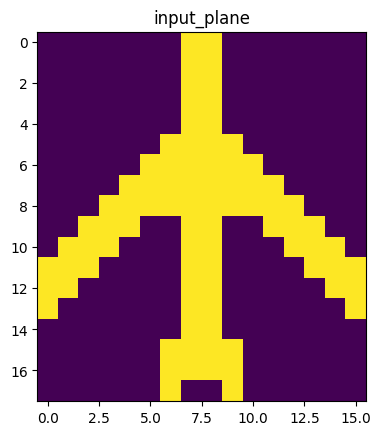

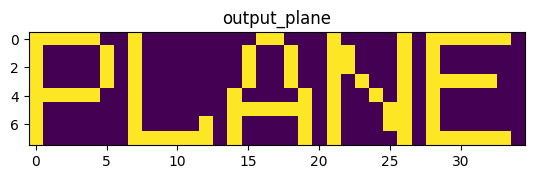

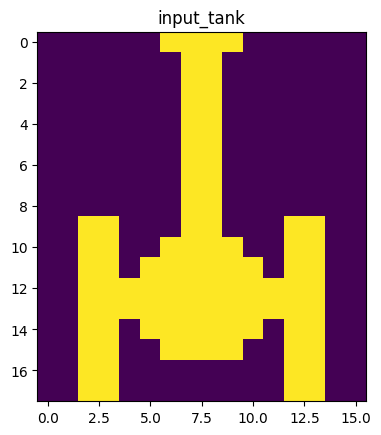

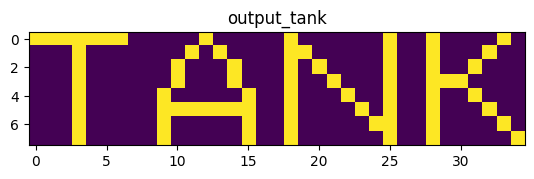

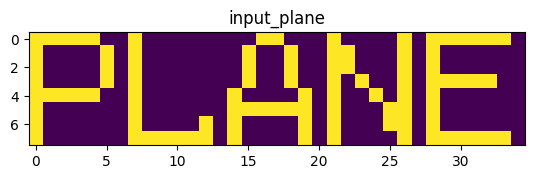

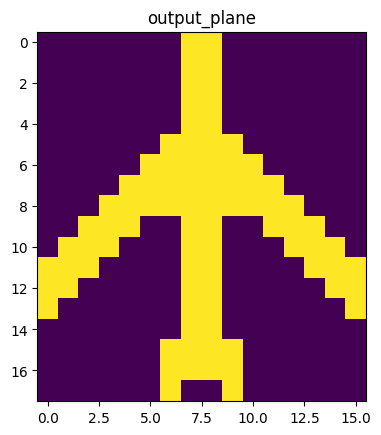

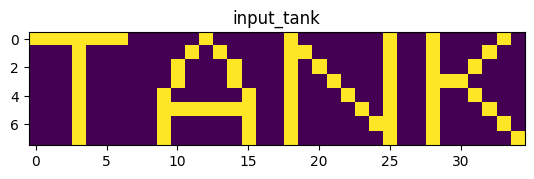

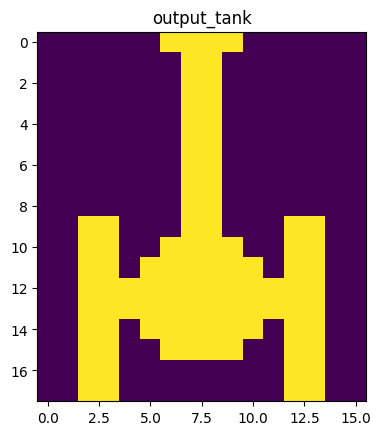

(280,)


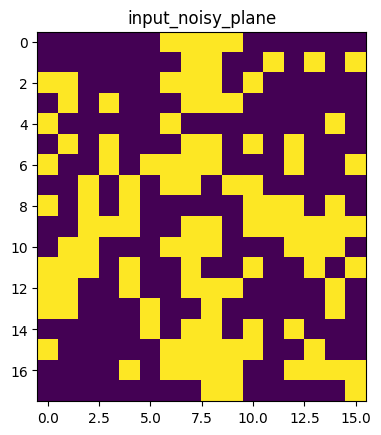

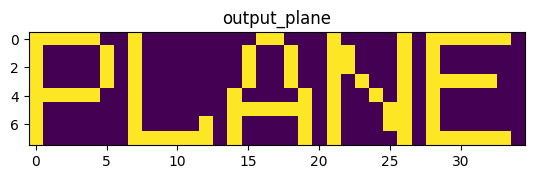

(280,)


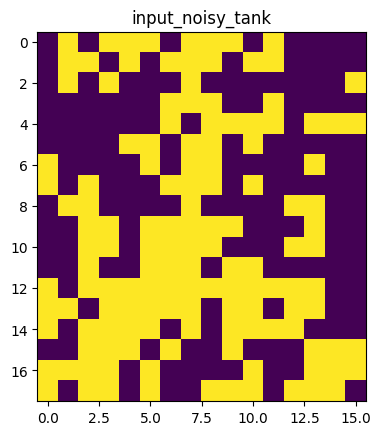

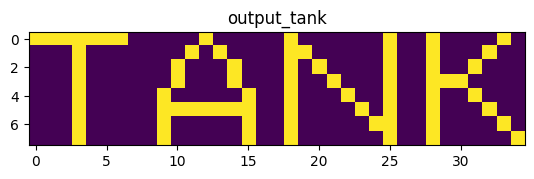

In [25]:
plane_pic = np.array([[-1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                       -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1,
                       -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1,
                       -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1,
                       1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1,
                       1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1,
                       1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1,
                       -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1]])

plane_txt = np.array([[1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1,
                       -1, 1, 1, 1, 1, 1, 1, -1,
                      1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1,
                       1, -1, 1, -1, -1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1,
                       1, -1, 1, -1, -1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1,
                       1, -1, 1, 1, 1, 1, 1, -1, -1,
                      1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1,
                       -1, 1, -1, -1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1,
                       -1, 1, -1, -1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1,
                       1, -1, 1, -1, -1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1,
                       -1, 1, 1, 1, 1, 1, 1, -1]])

tank_pic = np.array([[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1,
                     -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1,
                     -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1,
                     -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1,
                     -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                     -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                     -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1,
                     -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1,
                     -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                     -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1]])

tank_txt = np.array([[1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1,
                      -1, 1, -1, -1, -1, -1, 1, -1,
                     -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1,
                      -1, -1, 1, -1, -1, -1, 1, -1, -1,
                     -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1,
                      -1, -1, 1, -1, -1, 1, -1, -1, -1,
                     -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1,
                      -1, -1, 1, 1, 1, -1, -1, -1, -1,
                     -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1,
                      -1, -1, 1, -1, -1, 1, -1, -1, -1,
                     -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1,
                      -1, 1, -1, -1, -1, 1, -1, -1,
                     -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1,
                      -1, -1, 1, -1, -1, -1, -1, 1, -1,
                     -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1,
                      -1, -1, 1, -1, -1, -1, -1, -1, 1]])

# plt.imshow(plane_pic.reshape(18, 16))
# plt.show()
# plt.imshow(plane_txt.reshape(8, 35))
# plt.show()
# plt.imshow(tank_pic.reshape(18, 16))
# plt.show()
# plt.imshow(tank_txt.reshape(8, 35))
# plt.show()
''''''''''''' calculate weights'''''''''''''''
w = np.zeros([18 * 16, 8 * 35])
pic = np.vstack([plane_pic, tank_pic])
print(np.shape(pic))
txt = np.vstack([plane_txt, tank_txt])
print(np.shape(txt))
w = np.matmul(pic.T, txt)
print(np.shape(w))
''''''''''''' input -> pic output -> txt'''''''''''''''
y1 = np.sign(np.matmul(pic, w))
print(np.shape(y1))
plt.imshow(plane_pic.reshape(18, 16))
plt.title("input_plane")
plt.show()
plt.title("output_plane")
plt.imshow(y1[0].reshape(8, 35))
plt.show()
plt.imshow(tank_pic.reshape(18, 16))
plt.title("input_tank")
plt.show()
plt.title("output_tank")
plt.imshow(y1[1].reshape(8, 35))
plt.show()
''''''''''''' input -> txt output -> pic'''''''''''''''
y2 = np.sign(np.matmul(txt, w.T))
plt.imshow(plane_txt.reshape(8, 35))
plt.title("input_plane")
plt.show()
plt.title("output_plane")
plt.imshow(y2[0].reshape(18, 16))
plt.show()
plt.imshow(tank_txt.reshape(8, 35))
plt.title("input_tank")
plt.show()
plt.title("output_tank")
plt.imshow(y2[1].reshape(18, 16))
plt.show()

'''''''''''''''add disturbance '''''''''''''''''

def decision(probability):
    return random.random() < probability


def mistake(input, probability):
    new_input = np.copy(input)
    for i in range(len(input)):
        if decision(probability) is True:
            new_input[i] = -new_input[i]
    return new_input


temp_input_plane = mistake(pic[0], 0.3)
y3 = np.sign(np.matmul(temp_input_plane, w))
print(np.shape(y3))
plt.imshow(temp_input_plane.reshape(18, 16))
plt.title("input_noisy_plane")
plt.show()
plt.title("output_plane")
plt.imshow(y3.reshape(8, 35))
plt.show()

temp_input_tank = mistake(pic[1], 0.3)
y4 = np.sign(np.matmul(temp_input_tank, w))
print(np.shape(y4))
plt.imshow(temp_input_tank.reshape(18, 16))
plt.title("input_noisy_tank")
plt.show()
plt.title("output_tank")
plt.imshow(y4.reshape(8, 35))
plt.show()